# Handwriting Recognition Model (Neural Networks)

In [1]:
# Imports and Setup
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Check TensorFlow version and GPU availability
print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow Version: 2.17.0
Num GPUs Available:  0


## Load the data

In [2]:
# Loading and Preprocessing Data

# Load the MNIST dataset, which contains 28x28 grayscale images of handwritten digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to have values between 0 and 1 by dividing by 255
# This helps in faster convergence during training
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build the Model
1. Input Layer: Converts the 28x28 images into a 1D array of 784 values.

2. Dense Layer (Hidden Layer): A fully connected layer with 128 neurons and ReLU activation.

3. Dense Layer (Output Layer): A fully connected layer with 10 neurons (one for each digit) and softmax activation.

Note: The ReLU activation function is chosen for its ability to introduce non-linearity, while softmax is used in the output layer to produce a probability distribution over the classes

In [3]:
# Building the Model

# Initialize a Sequential model, which is a linear stack of layers
model = Sequential([
    Input(shape=(28, 28)),         # Input layer, specifying the shape of input data (28x28 pixels)
    Flatten(),                     # Flatten the 28x28 images into a 1D array of 784 values
    Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation function
    Dropout(0.2),                  # Dropout layer to prevent overfitting, with 20% dropout rate
    Dense(10, activation='softmax')# Output layer with 10 neurons (one for each class) and softmax activation function
])

## Compile the Model
We need to compile the model by specifying the optimizer, loss function, and metrics. We'll use the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

1. Optimizer (Adam): Efficient for training deep learning models.
2. Loss Function (Sparse Categorical Crossentropy): Suitable for multi-class classification.
3. Metrics (Accuracy): Evaluates the model's performance by calculating the percentage of correctly predicted instances.

In [4]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model
Set 20% training data for validation

In [5]:
# Training the Model

# Train the model with the training data
# - epochs: Number of times the model will iterate over the entire training data
# - validation_split: Fraction of training data to be used as validation data (0.2 means 20%)
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8450 - loss: 0.5279 - val_accuracy: 0.9586 - val_loss: 0.1556
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9506 - loss: 0.1694 - val_accuracy: 0.9652 - val_loss: 0.1170
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9653 - loss: 0.1194 - val_accuracy: 0.9692 - val_loss: 0.0997
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.0970 - val_accuracy: 0.9738 - val_loss: 0.0903
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9768 - loss: 0.0777 - val_accuracy: 0.9734 - val_loss: 0.0869


## Evaluate the Model
Using test data and observe the test accuracy

In [6]:
# Evaluating the Model

# Evaluate the model's performance using the test data
# - verbose=2: Print a summary of the evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9753 - loss: 0.0811

Test accuracy: 0.9753000140190125


## Making Predictions
After evaluating the model, we can use it to make predictions on new data. The model outputs probabilities for each class (0-9), and we use argmax to get the index of the highest probability, which corresponds to the predicted class

In [7]:
# Making Predictions

# Make predictions on the test data
# The model outputs probabilities for each class (0-9)
predictions = model.predict(x_test)

# Display the prediction for the first test image
# - argmax: Get the index of the highest probability, which is the predicted class
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[4.2705037e-07 3.9680231e-08 6.0289502e-05 8.6337788e-04 2.4774030e-10
 1.3764551e-07 2.9084998e-11 9.9905521e-01 2.9142270e-06 1.7648366e-05]


## Plot test image

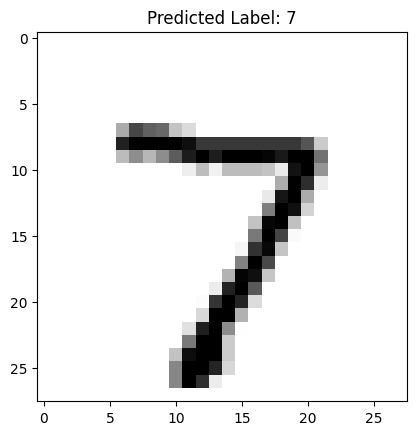

In [8]:
# Plotting a Test Image and Prediction

# Plot the first test image
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)

# Title the plot with the predicted label
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.show()

## Visualise Training Results

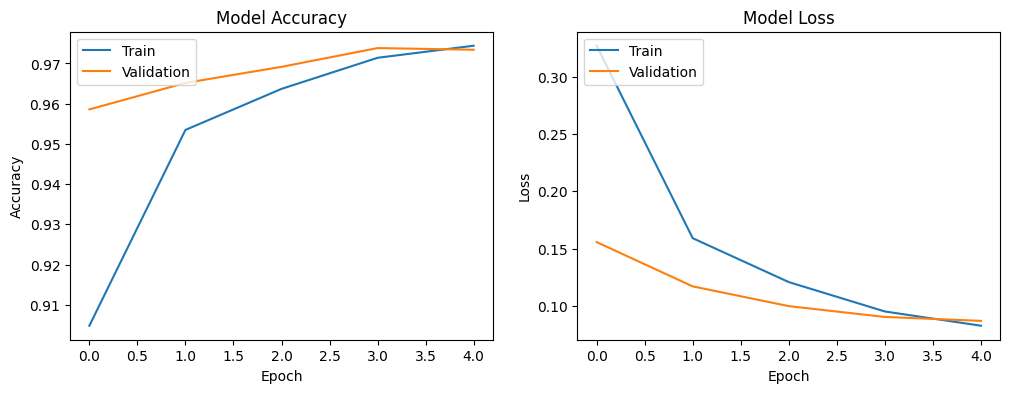

In [9]:
# Visualizing Training Results

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()